In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('amzn.csv')

df=df.set_index(pd.DatetimeIndex(df['Date'].values))


In [3]:
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.8)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [4]:
training_data=scaled_data[0:training_data_len , :]


In [5]:
xtrain=[]
ytrain=[]
n=14

In [6]:
for i in range(n,len(training_data)):
    xtrain.append(training_data[i-n:i , 0])
    ytrain.append(training_data[i,0])

In [7]:
xtrain , ytrain = np.array(xtrain),np.array(ytrain)


In [8]:
xtrain=np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))
xtrain.shape

(4617, 14, 1)

In [9]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(xtrain.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [10]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(xtrain,ytrain,batch_size=1,epochs=1)



4617/4617 [==============================] - 52s 11ms/step - loss: 4.1135e-05


In [11]:
test_data=scaled_data[training_data_len - n : , :]
xtest=[]
ytest=dataset[training_data_len: , :]
for i in range(n,len(test_data)):
    xtest.append(test_data[i-n:i,0])  

In [12]:
xtest=np.array(xtest)
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))


In [13]:
prediction=model.predict(xtest)
prediction=scaler.inverse_transform(prediction)
rmse =np.sqrt(np.mean(((prediction- ytest)**2)))
print(rmse)

37/37 [==============================] - 1s 3ms/step
191.6787384614881


In [14]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['prediction']=prediction

C:\Users\moham\AppData\Local\Temp\ipykernel_14156\3517524298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction']=prediction


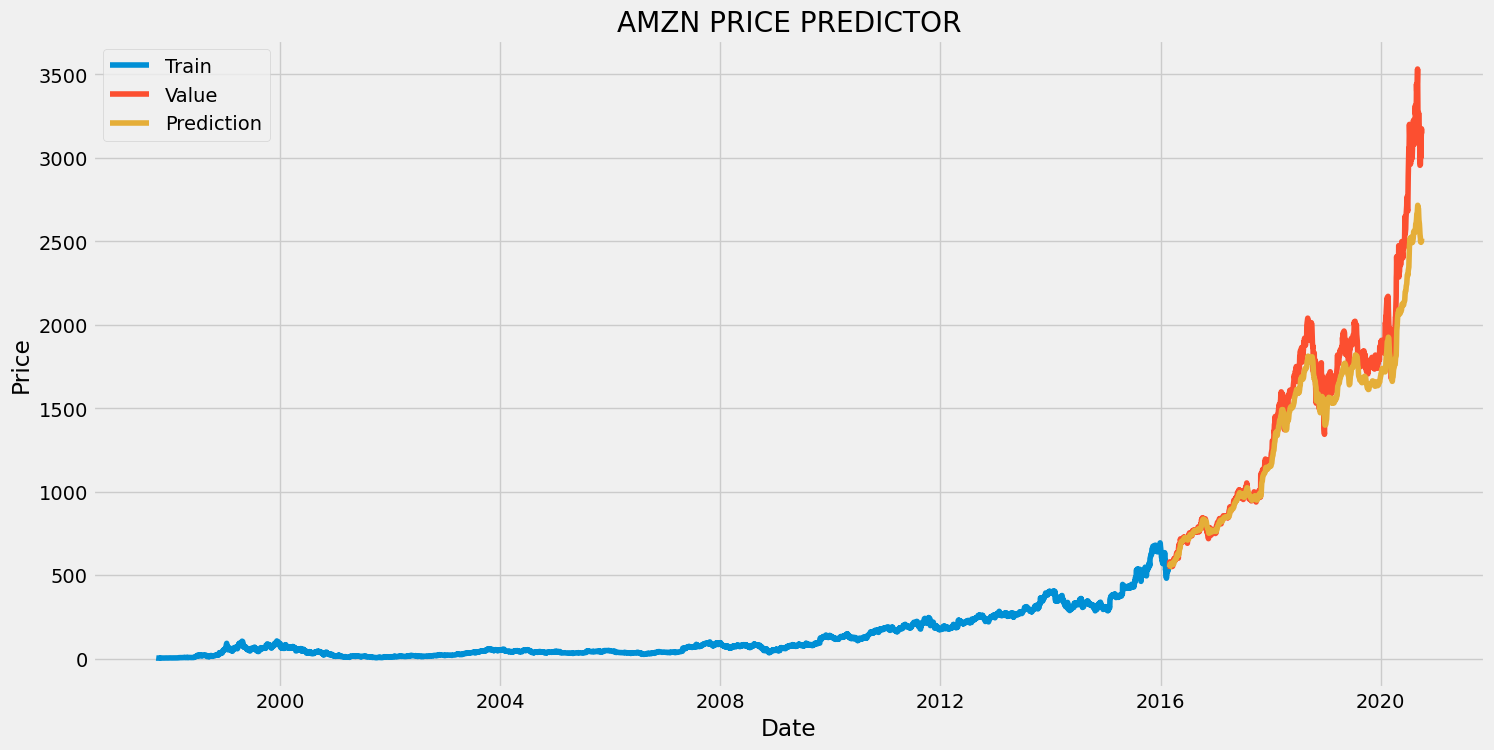

In [15]:
plt.figure(figsize=(16,8))
plt.title('AMZN PRICE PREDICTOR')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Train','Value','Prediction'])
plt.show()

In [16]:
forecast_range = 5
new_df = df.filter(['Close'])

In [17]:
new_df[-n:].values


array([[3175.110107],
       [3116.219971],
       [3102.969971],
       [3156.129883],
       [3078.100098],
       [3008.72998 ],
       [2954.909912],
       [2960.469971],
       [3128.98999 ],
       [2999.860107],
       [3019.790039],
       [3095.129883],
       [3174.050049],
       [3144.879883]])

In [18]:
pred_df = pd.DataFrame()
pred_df['Date'] = pd.date_range(start = df.Date.iloc[-1] , periods = forecast_range+1 , closed = 'right')

pred_df =pred_df.set_index(pd.DatetimeIndex(pred_df['Date'].values))


TypeError: DatetimeArray._generate_range() got an unexpected keyword argument 'closed'

In [19]:
pred_df

""


In [20]:
predictiondata = []

In [21]:
for i in range(0, forecast_range):
    last_values = new_df[-n:].values
    last_values_scaled = scaler.transform(last_values)
    X_input = []
    X_input.append(last_values_scaled)
    X_input = np.array(X_input)
    X_test = np.reshape(X_input, (X_input.shape[0], X_input.shape[1], 1))
    pred_value = model.predict(X_input)
    pred_value_unscaled = scaler.inverse_transform(pred_value)
    dfindex = pred_df.iloc[[i]].index 
    new_df = new_df.append(pd.DataFrame({"Close": pred_value_unscaled[0,0]}, index=dfindex))
    predictiondata.append(pred_value_unscaled[0,0])



1/1 [==============================] - 0s 19ms/step


IndexError: positional indexers are out-of-bounds

In [22]:
new_df.tail(10)


,Close
2020-09-16,3078.100098
2020-09-17,3008.729980
2020-09-18,2954.909912
2020-09-21,2960.469971
2020-09-22,3128.989990
2020-09-23,2999.860107
2020-09-24,3019.790039
2020-09-25,3095.129883
2020-09-28,3174.050049
2020-09-29,3144.879883


In [23]:
predictiondata

[]